In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns
import scipy.stats as stats
from sklearn.decomposition import PCA

In [39]:
df = pd.read_csv(r'C:\Users\paowm\Downloads\churn_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [40]:
pd.set_option('display.max_columns', None)
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [41]:
df_features = df[['Income', 'Outage_sec_perweek','Tenure','MonthlyCharge','Bandwidth_GB_Year']]

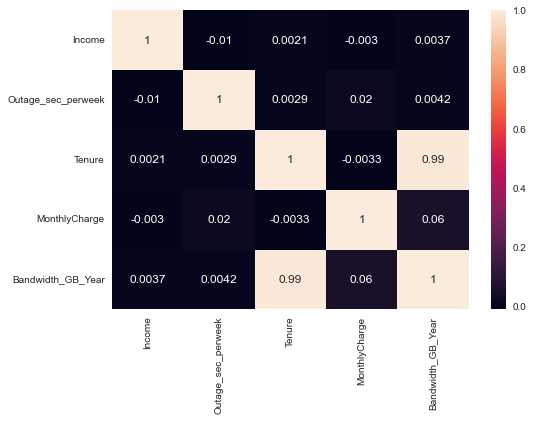

In [42]:
ax = sns.heatmap(df_features.corr(), annot=True)

In [43]:
scaler = StandardScaler()
scaler.fit(df_features)
df_norm = scaler.transform(df_features)
df_n = pd.DataFrame(df_norm)

In [44]:
df_n.to_csv(r'C:\Users\paowm\Downloads\df_clean.csv')

In [45]:
pca= PCA(n_components=5)
#pca.fit(df_norm)
pc =  pca.fit_transform(df_n)
df_pca = pd.DataFrame(pc, columns=['PC1','PC2','PC3','PC4','PC5'])
df_pca

,PC1,PC2,PC3,PC4,PC5
0,-1.551056,0.279016,-0.380379,-0.620483,-0.064167
1,-1.662133,-1.703695,0.213964,-0.826325,-0.020960
2,-0.948752,-0.406056,-1.047420,0.085881,0.082959
3,-0.906067,-0.650333,-1.047113,1.780911,0.124810
4,-1.912132,0.712517,-0.230851,-0.147779,-0.108952
...,...,...,...,...,...
9995,1.897218,0.577749,0.324270,0.222006,0.123121
9996,1.479124,0.202701,0.054879,-1.336178,0.001084
9997,0.583942,0.921346,0.065408,-0.723566,-0.093406
9998,2.048431,-1.895463,0.083228,-0.850018,-0.064191


In [46]:
var_exp = pca.explained_variance_ratio_

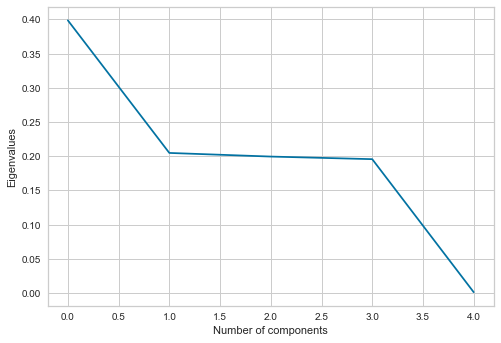

In [47]:
plt.plot(var_exp)
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')
plt.show()

In [48]:
print ("Proportion of Variance Explained : ", var_exp)  
    
out_sum = np.cumsum(var_exp)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.39863731 0.20482573 0.19951987 0.19572574 0.00129135]
Cumulative Prop. Variance Explained:  [0.39863731 0.60346304 0.80298291 0.99870865 1.        ]


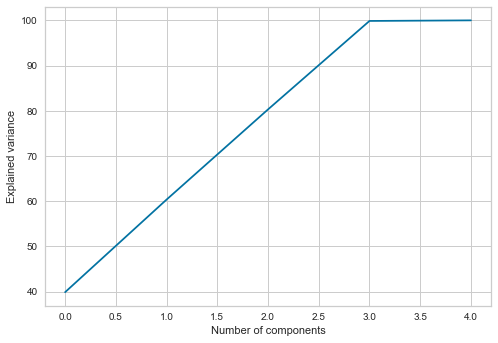

In [49]:
plt.plot(np.cumsum(var_exp*100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('elbow_plot.png')